# Lab 01: Procesamiento de datos

Antes de empezar a entrenar un modelo es importante **conocer los datos** para alimentar el modelo con datos que aporten valor y nos ayuden a realizar una correcta Prediccion/Clasificacion/Segmentacion.  Esta actividad se conoce como **Analisis Exploratorio (EDA)**  
Vamos a analizar dos atributos importantes a la hora de definir que variables van a alimentar el modelo:
- Calidad de Datos
- Correlacion entre los Datos

## Configuracion
Trate de ejecutar la siguiente celda para validar que las librerias que vamos a utilizar hoy se encentran instaladas correctamente.  Si no es asi, instale las librerias faltantes.  Luego, vuelva a intentar cargarlas hasta que la celda se ejecute sin errores.

In [1]:
library(dplyr)
library(skimr)
library(tidyr)
library(ggplot2)
library(corrgram)
library(lattice)
library(car)
library(esquisse)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lattice’


The following object is masked from ‘package:corrgram’:

    panel.fill


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
library(repr)

## Cargar el set de datos
Vamos a usar un set de datos del [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) en donde se registran los atributos de varias botellas de vino junto con su calidad.  Este dataset ha sido modificado un poco para trabajar la limpieza y calidad en este laboratorio.  La version original puede descargrse [aqui](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv)

Vamos a cargar este dataset en este laboratorio para procesarlo y dejarlo listo para los **siguientes laboratorios** de prediccion y clasificacion.  De esta forma usaremos el mismo dataset a lo largo de todo el flujo del curso como si se tratara de un proyecto real!

In [3]:
wine_df <- read.csv('data/winequality-red.csv', sep = ';', header = T, fileEncoding = 'utf-8')

## Calidad de Datos  
Lo primero que debemos hacer, y que parece obvio, es revisar una muestra de los datos para darnos una idea de los valores que vienen en cada columna/atributo

In [4]:
head(wine_df) # Permite ver: dimensiones, tipos de dato y muestra

fixed_acidity volatile_acidity citric_acid residual_sugar chlorides
1  7.4          0.70               NA        1.9            0.076    
2  7.8          0.88               NA        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70               NA        1.9            0.076    
6  7.4          0.66               NA        1.8            0.075    
  free_sulfur_dioxide total_sulfur_dioxide density pH   sulphates alcohol color
1 11                  34                   0.9978  3.51 0.56      9.4     NA   
2 25                  67                   0.9968  3.20 0.68      9.8     NA   
3 15                  54                   0.9970  3.26 0.65      9.8     NA   
4 17                  60                   0.9980  3.16 0.58      9.8     NA   
5 11                  34                   0.9978  3.51 0.56      9.4     NA   
6 13                  40                   0.9978  3.51 0.56      9.4     NA   
  high_quality
1 0           
2 0           
3 0           
4 1           
5 0           
6 0

Tambien es importante conocer con anterioridad el tamaño de los datos con los que estamos tratando, esto podemos verlo en las variables de ambiente de la derecha.

En este caso, la cantidad de filas (4898) es la cantidad de muestras o registros a analizar y la cantidad de columnas (12) son los atributos o variables de cada muestra.  

Otra buena practica al iniciar el Analisis Exploratorio es validar los tipos de dato con los que estamos tratando.  Esto nos permitira tratar cada atributo de la manera correspondiente o realizar las transformaciones necesarias.

In [5]:
glimpse(wine_df) # Permite ver: dimensiones, tipos de dato y muestra

Rows: 1,599
Columns: 13
$ fixed_acidity        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 7.…
$ volatile_acidity     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0.600,…
$ citric_acid          <dbl> NA, NA, 0.04, 0.56, NA, NA, 0.06, NA, 0.02, 0.36…
$ residual_sugar       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1…
$ chlorides            <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069,…
$ free_sulfur_dioxide  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 17, 1…
$ total_sulfur_dioxide <dbl> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 65, 102…
$ density              <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.9978, …
$ pH                   <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39, …
$ sulphates            <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0.47, …
$ alcohol              <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5, 10…
$ color                <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ high_quality         <int>

En este caso, todas las variables son numericas (dbl o int), lo que las hace buenas candidatas para un modelo, por ejemplo de regresion.  Si se encontraran variables categoricas deberiamos hacer la validacion y transformacion de estos valores.  

Ya con una idea mas clara de la estructura de datos con la que estamos tratando, realicemos un analisis matematico rapido sobre los datos:

In [6]:
summary(wine_df)

 fixed_acidity   volatile_acidity  citric_acid     residual_sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.0100   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.1400   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.2800   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.2954   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.4400   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.0000   Max.   :15.500  
                                  NA's   :132                      
   chlorides       free_sulfur_dioxide total_sulfur_dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9

Esto nos entrega un resumen de las medidas de tendencia y dispercion de los atributos **numericos** de nuestro dataset:  
- **Conteo de registros:** Nos permite validar si algunos campos vienen Nulos (NA's)
- **Promedio:** Nos da una idea de la dispercion de cada atributo
- **Valores Minimo y Maximo:** Nos permite conocer el dominio de valores entre los que se distribuye cada atributo
- **Cuartiles:** Nos da un resumen de la distribucion de los valores y posibles atipicos  

Ya tenemos un poco mas clara la **estructura** de los datos, pero con solo ver una muestra de 5 registros, no podemos estar seguros de conocer todos los posibles **valores** de cada columna.  

### Datos Faltantes
En R, un dato vacio o faltante es identificado con el valor *NA* (Not a Number) y debemos identificar que valores faltantes hay en cada atributo y entender su significado.  Ya lo vimos en el conteo de valores de la celda anterior, pero tambien podemos verlo particularmente:

In [7]:
colSums(is.na(wine_df))

fixed_acidity     volatile_acidity          citric_acid 
                   0                    0                  132 
      residual_sugar            chlorides  free_sulfur_dioxide 
                   0                    0                    0 
total_sulfur_dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol                color 
                   0                    0                 1484 
        high_quality 
                   0

Hay dos variables que llaman nuestra atencion: *citric acid* y *color*. Que podemos hacer con estos datos?
- Si son datos invalidos podemos eliminarlos: OJO, aunque esto asegura que tendremos solo registros *limpios*, tambien perderemos registros que podrian contener otra informacion util para el modelo.
- Si son datos invalidos tambien podemos reemplazarlos con valor valido, por ejemplo co el promedio de los valores validos de ese mismo atributo. De esta forma conservamos la cantidad de registros y no perdemos valor para ese atributo, pero OJO: el valor de reemplazo debe tener sentido para el negocio.
- Si son datos validos para el negocio, por ejemplo, se acostumbra dejar vacio cuando es valor 0, podemos hacer este reemplazo directamente para que el modelo entienda eso.  OJO: En este caso se deben tener muy claras las reglas de negocio. **Este es el caso de "citric acid"**
- Si son **muchos** los valores en nulo en una columna en partcular, se puede considerar no tener en cuenta ese atributo en el analisis porque no estaria aportando valor diferencial a cada muestra. **Este es el caso de "color"**  

Ya vimos en la descripcion de datos que el minimo valor de *citric acid* es 0.12, cuando es posible quela acidez de un vino tinto sea 0 y no tenemos valores en 0. Coincidencia?  
Vamos a arriesgarnos a reemplazar los valores por cero (0), para no tener que eliminar estos registros

In [8]:
wine_df['citric.acid'] <- replace(wine_df['citric_acid'],
                                  is.na(wine_df['citric_acid']),0)

El caso de *color* es distinto, son **muchos** los valores faltantes (1484 de 4898).  Veamos que valores tienen los pocos registros que si aportan informacion

In [9]:
sum(is.na(wine_df['color'])) # Contar valores nulos
table(wine_df['color'])      # COntar valores no Nulos

[1] 1484


 13 
115 

Ademas de los 3593 valores en Nulo, se tienen 428 en valor *8* y 877 en valor *13*.
Estos valores realmente no nos dicen nada, si no conocemos el significado de cada uno.  Lo mejor en este caso es eliminar la columna ya que no aportaria nada al modelo, ni es algo que podamos explicar.

In [10]:
wine_df = subset(wine_df, select = -c(color))

### Valores Atipicos
Un valor atipico (en ingles *Outlier*) es un valor que esta por fuera del dominio normal de una variable.  Por ejemplo, en un set de datos de personas, el dominio de la variable *edad* podria ser entre 1 y 99 años.  Si se encuentra un valor negativo, o un valor muy alto (Por ejemplo, 200) que es imposible, o raro dentro del concepto (edad)es considerado atipico y debe ser tratado con cuidado.  
Ya en celdas alteriores vimos una forma de detectar atipicos de forma general en el dataset con la funcion *df.describe()*, ya que nos entrega los quartiles.  Sin embargo, siempre es mas facil entender los datos graficamente:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 19 rows containing non-finite values (stat_bin).”


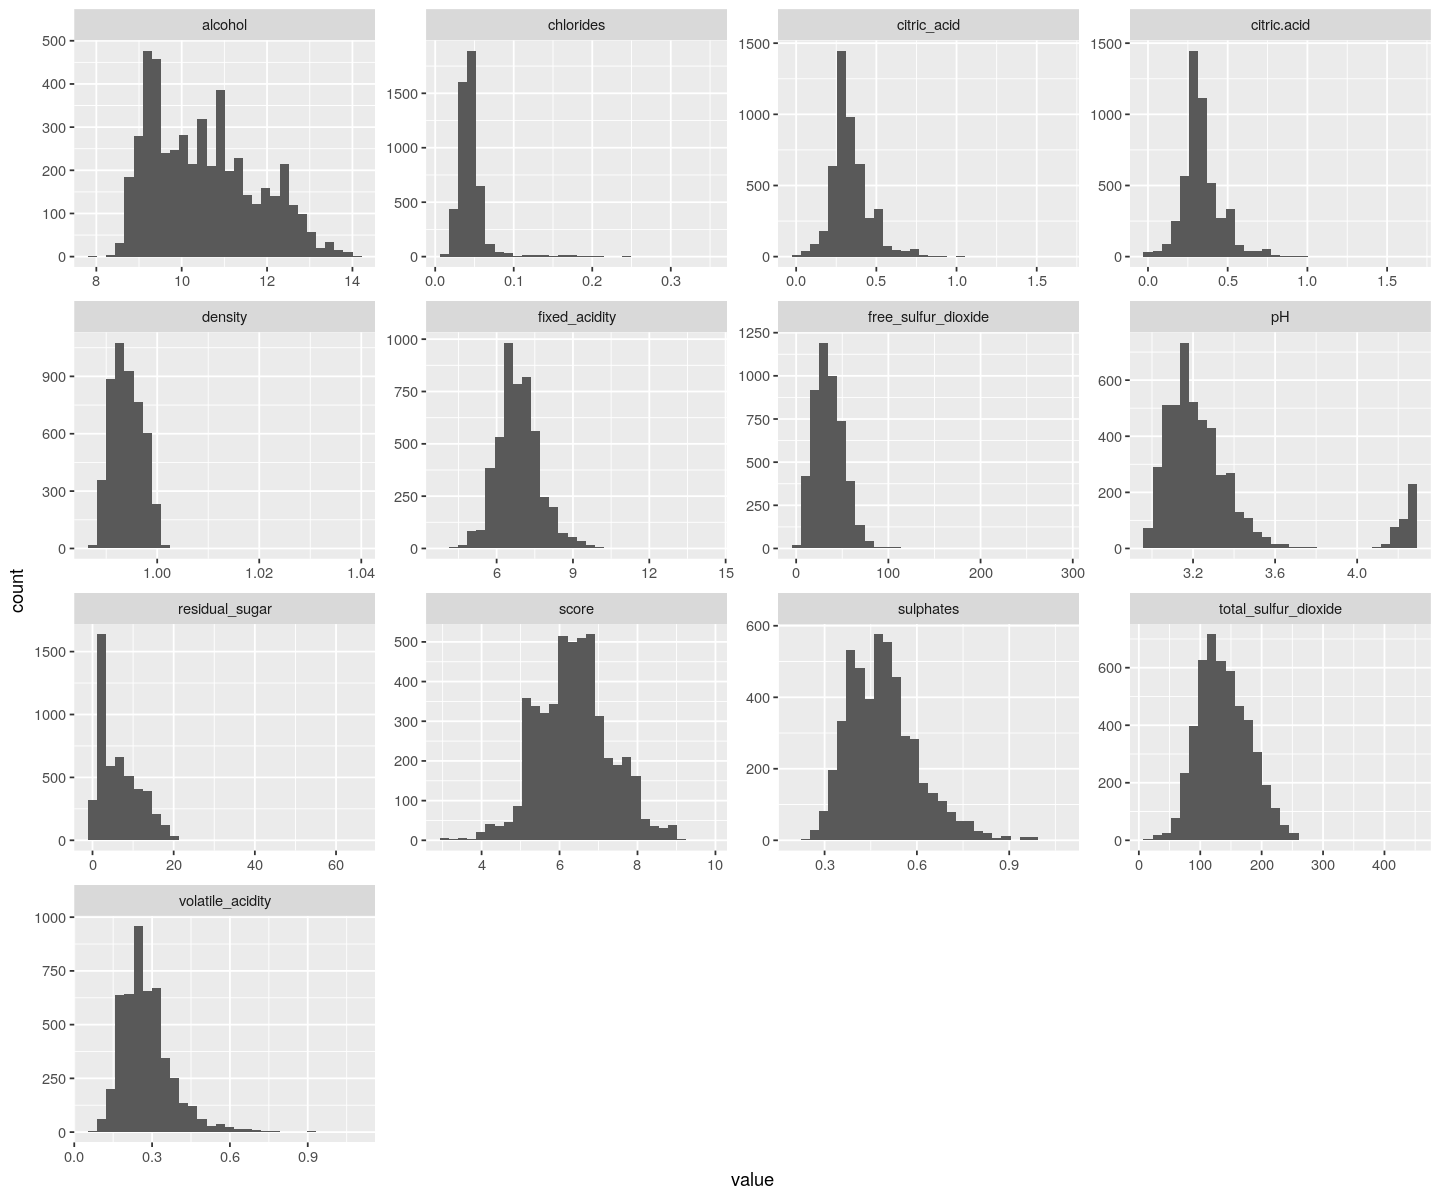

In [11]:
options(repr.plot.width = 12, repr.plot.height=10)

wine_df %>%
  gather() %>%                       # Llave-Valor
  ggplot(aes(value)) +               # Grafica
  facet_wrap(~ key, scales="free") + # En panees diferentes
  geom_histogram()                   # Tipo de grafica

Esto nos permite visualizar la distribucion de cada variable, valores mas comunes y de pronto algunos atipicos.  Pero la mejor forma de determinar si hay datos fuera de lo normal es con un analisis estadistico de cajas:

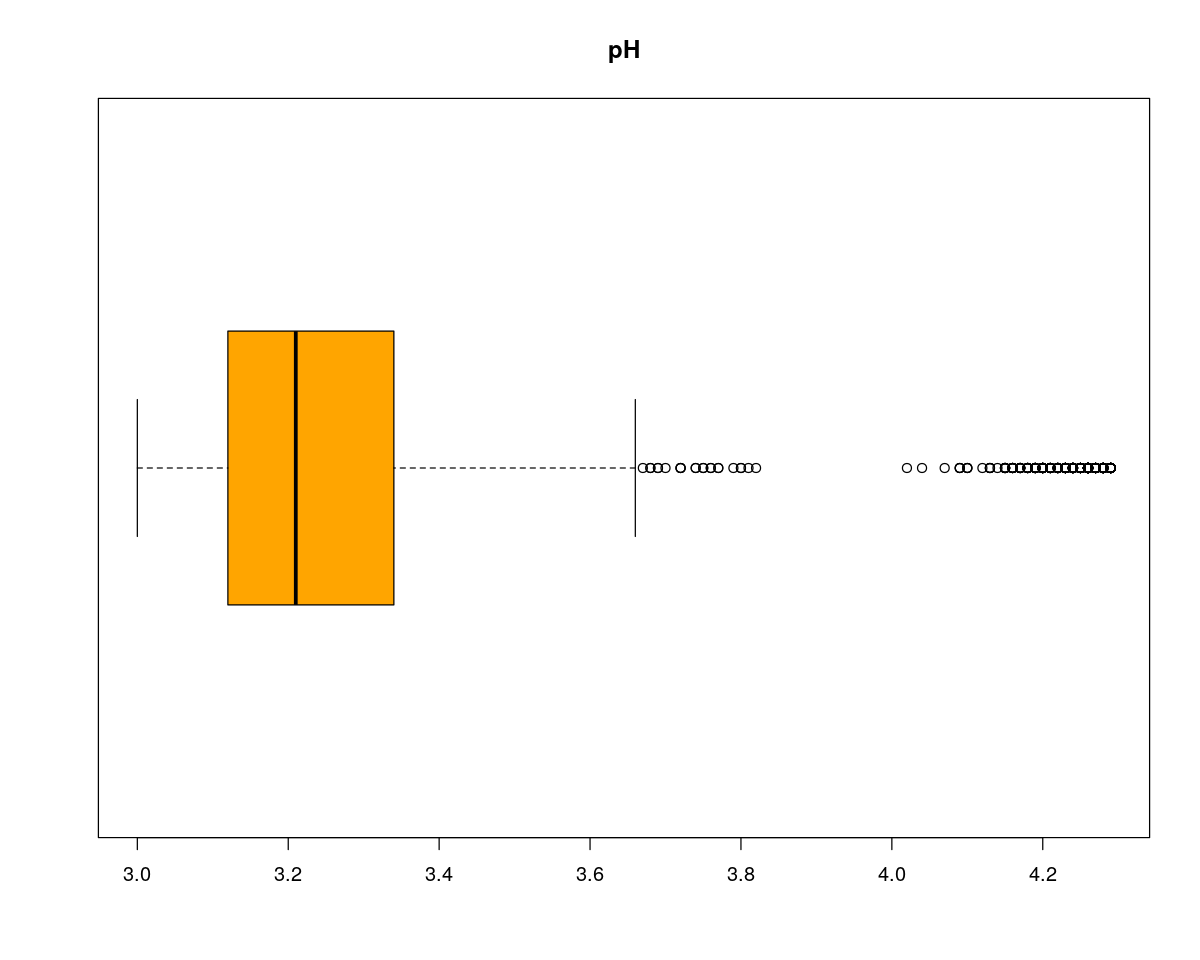

In [12]:
options(repr.plot.width = 10, repr.plot.height=8)

boxplot(wine_df['pH'], main='pH',
        horizontal=T, col='orange')

Dicen los [expertos](https://www.aprenderdevino.es/ph-y-vino/), que el pH de un vino tinto varia entre 3.3 y 3.6 g/l.  Éste conocimiento de negocio, asi como la grafica anterior nos permite dudar un poco de las muestras con valores superiores, por ejemplo a **4**.  *Este valor puede variar como consideremos conveniente.  No se recomienda cortar estrictamente en el intervalo que dicta la regla de negocio (3.3 - 3.6) pues algunos atipicos cercanos pueden ser posibles enla naturaleza*

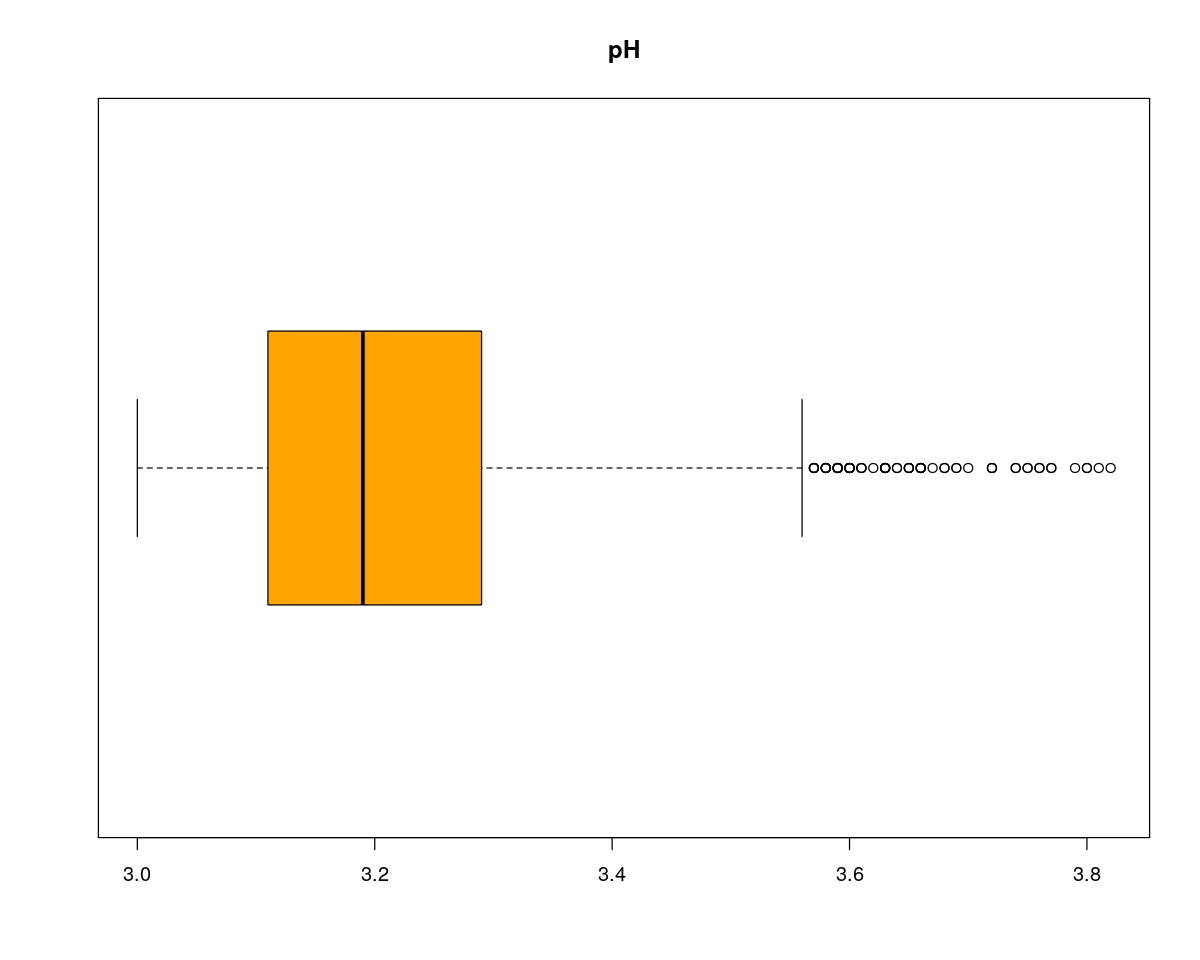

In [13]:
wine_df <- wine_df %>%
  filter(pH < 4)

boxplot(wine_df['pH'], main='pH',
        horizontal=T, col='orange')

In [14]:
# Resumen estadistico (Otra forma)
skim(wine_df)

── Data Summary ────────────────────────
                           Values 
Name                       wine_df
Number of rows             4461   
Number of columns          13     
_______________________           
Column type frequency:            
  numeric                  13     
________________________          
Group variables            None   

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable        n_missing complete_rate     mean       sd    p0     p25
 1 fixed_acidity                0         1       6.79    0.805   3.8     6.3  
 2 volatile_acidity             0         1       0.280   0.101   0.08    0.21 
 3 citric_acid                 19         0.996   0.332   0.116   0.01    0.262
 4 residual_sugar               0         1       6.23    4.98    0.6     1.7  
 5 chlorides                    0         1       0.0455  0.0207  0.009   0.036
 6 free_sulfur_dioxide          0         1      35.5    17.0     2      24    
 7

Realizando de nuevo nuestro resumen de metricas estadisticas, vemos que ya no se tienen valores faltantes es nungun atributo. La distribucion de las columnas que hemos modificado ha cambiado un poco, pero su desviacion y distribucion en general se ajusta mas para un analisis predictivo.  

El analisis predictivo en el que vamos a trabajar en los siguientes laboratorios se realizara sobre las siguientes variables objetivo:

- Analisis Predictivo sobre la variable *score* (Archivo winequality-white.csv)
- Analisis de Clasificacion sobre la variable *high_quality* (Archivo winequality-red.csv)

Vamos ahora a preparar los datos y las variables orientandolos a este tipo de modelos

### Correlacion y Multicolinearidad
Otro analisis que debemos realizar antes de empezar a crear un modelo, es elegir cuales variables incluir y cuales no dependiendo de la variable que vamos a predecir, esta se conoce como **variable objetivo**.  Es importante tener en cuenta atributos que aporten valor predictivo a la variable objetivo y eliminar de nuestro analisis aquellas que no o que, por el contrario introduscan ruido al modelo (Ya hemos hecho esto, por ejemplo con el atributo *color*).  Esto facilitara al modelo de tener que elegir y buscar tendencias sobre muchas variables que, de antemano sabemos que no estan relacionadas con nuestra variable objetivo.  Este proceso se le conoce como **feature engineering***  

Ademas de eliminar las columnas con ruido o con muchos Nulos, como ya hicimos con el atributo *color*, es importante validar la **correlacion entre variables**, es decir, analizar la relacion de cambio entre cada pareja de variables, si una varibale aumenta, aumenta la otra? disminuye? En la misma proporcion?.  
Cuando dos **variables predictivas** estan altamente correlacionadas se le llama [multicolinearidad](https://en.wikipedia.org/wiki/Multicollinearity), y sobre esto debemos tener cuidado, pues puede desestabilizar nuestro modelo.  Entre mas correlacionadas esten dos variables, no sirve de nada incluir las dos en el modelo pues menor valor le aportarán, una es redundante con la otra.

Por otro lado, si una variable predictiva esta altamente correlacionada con la **variable objetivo**, en este caso es algo bueno! Significa que es una variable que si querremos incluir en el modelo la que explican en gran parte la varianza de la misma.

Vamos a analizar **visualmente** la relacion de las variables entre si, asi como con la variable objetivo *score*:

Warning message in scatterplotMatrix.default(X[, -ncol], groups = X[, ncol], ...):
“number of groups exceeds number of available colors
  colors are recycled”
Warning message in diag.panel(...):
“cannot estimate density for group 3.01
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.05
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.11
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.18
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.36
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.44
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.52
Error in bw(x) : need

Warning message in diag.panel(...):
“cannot estimate density for group 8.42
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.44
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.47
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.48
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.51
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.54
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.57
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.61
Error in bw(x) : need at least 2 data points

”
Warning 

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '171' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '173' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '321' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '322' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '323' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '324' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '326' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '329' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '396' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '398' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '399' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '400' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '401' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '402' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '403' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '404' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '471' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '472' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '473' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '474' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '475' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '476' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '477' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '478' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '479' no es válido en este locale”
Warning me

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE,

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '138' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '138' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '138' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '138' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '138' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '138' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '138' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '144' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '144' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '144' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '144' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '145' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '145' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '145' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '145' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '145' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '152' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '152' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '164' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '164' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '169' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '169' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '169' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '169' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '169' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '169' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '169' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '169' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '169' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '181' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '181' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '181' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '181' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '219' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '219' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '219' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '219' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '219' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '219' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '219' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '219' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '219' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '301' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '301' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '301' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '301' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '301' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '302' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '302' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '311' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '311' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '311' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '311' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '311' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '311' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '312' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '312' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '321' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '329' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '330' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '330' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '330' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '330' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '330' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '330' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '330' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '330' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '339' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '339' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '339' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '339' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '340' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '340' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '340' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '340' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '340' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '348' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '348' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '348' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '348' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '348' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '348' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '348' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '348' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '357' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '357' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '357' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '358' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '358' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '358' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '358' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '358' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '358' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '367' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '367' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '367' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '368' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '368' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '368' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '368' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '368' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '376' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '376' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '376' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '376' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '385' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '385' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '385' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '385' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '385' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '385' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '394' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '394' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '394' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '394' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '394' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '394' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '394' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '395' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '395' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '415' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '416' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '417' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '418' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '418' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '418' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '418' no es válido en este locale”
Wa

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '445' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '446' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '446' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '447' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '448' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '448' no es válido en este locale

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '472' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '472' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '473' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '474' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '474' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '475' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '475' no es válido en este locale”
Wa

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE,

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '144' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '144' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '181' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '329' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '338' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '338' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '356' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '356' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '356' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '356' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '376' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '376' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '385' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '385' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '393' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '393' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '393' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '411' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '411' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '411' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '412' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '412' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '412' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '413' no es válido en este locale”
Wa

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '439' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '440' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '441' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '442' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '442' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '443' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '443' no es válido en este locale”
Wa

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '466' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '467' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '467' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '468' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '469' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '469' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '470' no es válido en este locale”
Wa

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE,

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '318' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '318' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '318' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '336' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '336' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '336' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '353' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '353' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '373' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '373' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning me

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '406' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '407' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '407' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '407' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '407' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '408' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '408' no es válido en este locale”
Wa

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '433' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '434' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '434' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '435' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '435' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '435' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '436' no es válido en este locale”
Wa

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '463' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '463' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '463' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '464' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '464' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '464' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '28' no implementado”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '29' no implementado”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '29' no implementado”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '29' no implementado”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '30' no implementado”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '130' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '130' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '171' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '188' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '307' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '316' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '316' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '316' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '324' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '324' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '352' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '352' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '352' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '352' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '362' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '362' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '379' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '380' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '380' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '380' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '380' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '398' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '398' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '398' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '399' no es válido en este locale”
Warnin

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '424' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '424' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '425' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '425' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '425' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '426' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '426' no es válido en este locale”
Wa

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '453' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '454' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '455' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '456' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '457' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '457' no es válido en este locale

Warning message in diag.panel(...):
“cannot estimate density for group 3.52
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.55
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.62
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.67
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.74
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.79
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.88
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.89
Error in bw(x) : need at least 2 data points

”
Warning 

Warning message in diag.panel(...):
“cannot estimate density for group 8.64
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.7
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.71
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.72
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.75
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.77
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.8
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.87
Error in bw(x) : need at least 2 data points

”
Warning me

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE,

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '144' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '144' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '181' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '329' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '329' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '338' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '338' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '338' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '356' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '356' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '356' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '409' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '409' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '410' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '410' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '411' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '411' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '411' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '412' no es válido en este locale”
Warnin

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '438' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '438' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '439' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '439' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '440' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '441' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '466' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '466' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '466' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '467' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '467' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '468' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '469' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '469' no es válido en este locale”
Warnin

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE,

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '130' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '173' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '173' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '173' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '190' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '190' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '190' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '196' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '316' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '316' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '318' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '326' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '326' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '344' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '344' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '353' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '353' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '353' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '353' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '353' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '353' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '363' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '363' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '363' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '363' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '372' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '373' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '373' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '373' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '373' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Wa

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '390' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '390' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '390' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '390' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '402' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '403' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '403' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '404' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '405' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '406' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '430' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '431' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '432' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '432' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '433' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '433' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '433' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Wa

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '461' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '461' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '461' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '462' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '463' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '463' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '463' no es válido en este locale”
Wa

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '26' no implementado”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '26' no implementado”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '27' no implementado”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '28' no implementado”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '29' no implementado”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '29' no implementado”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '29' no implementado”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could no

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '171' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '171' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '171' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '183' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '188' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '188' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '188' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '305' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '305' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '305' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '324' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '324' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '324' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '324' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '352' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '352' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '379' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '379' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '379' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '380' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '380' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '380' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '380' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning me

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '398' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '398' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '398' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '424' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '424' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '425' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '425' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '425' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '426' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '426' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '427' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '454' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '455' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '456' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '457' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '457' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '457' no es válido en este locale

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE,

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '135' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '135' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '135' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '147' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '147' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '152' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '152' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '152' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '152' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '153' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '153' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '153' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '153' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '153' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '158' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '158' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '158' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '159' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '159' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '159' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '159' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '159' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '159' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '164' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '164' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '164' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '164' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '171' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '171' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '183' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '183' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '183' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '183' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '188' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '188' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '188' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '188' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '219' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '302' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '302' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '303' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '303' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '303' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '303' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '304' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '304' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '312' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '314' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '321' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '321' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '321' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '321' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '322' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '322' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '322' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '322' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '323' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '332' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '332' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '332' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '332' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '340' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '349' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '349' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '350' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '350' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '350' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '350' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '350' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '350' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '360' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '360' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '360' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '360' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '368' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '378' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '378' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '378' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '378' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '387' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '387' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '387' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '387' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '395' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '395' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '395' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '396' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '396' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '396' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '396' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '396' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '396' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '418' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '419' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '419' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '419' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '420' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '421' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '421' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '421' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '449' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '450' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '450' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '450' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '451' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '452' no es válido en este locale

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '478' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '479' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '480' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in diag.panel(...):
“cannot estimate density for group 3.01
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 3.05
Error in bw(x)

Warning message in diag.panel(...):
“cannot estimate density for group 8.2
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.23
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.26
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.31
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.37
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.42
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.44
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 8.47
Error in bw(x) : need at least 2 data points

”
Warning m

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE,

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '131' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '142' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '167' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '173' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '174' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '185' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '190' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '214' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '236' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '257' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '294' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '298' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '308' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '309' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '316' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '317' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '318' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '318' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '327' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '335' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '336' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '336' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '353' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '353' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '353' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '364' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '373' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '373' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '373' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '382' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning me

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '405' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '406' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '407' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '407' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '407' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '407' no es válido en este locale

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '433' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '433' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '434' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '434' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '435' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '435' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '435' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '436' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '463' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '463' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '464' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '464' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '464' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '465' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '29' no implementado”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '29' no implementado”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '29' no implementado”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '30' no implementado”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '31' no implementado”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.arg

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '129' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '130' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '130' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '130' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '130' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '136' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '140' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '141' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '148' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '149' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '154' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '155' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '160' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '161' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '166' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '172' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '173' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '178' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '179' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '184' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '189' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '190' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '195' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '199' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '203' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '206' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '210' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '213' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '217' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '221' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '224' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '225' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '228' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '232' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '239' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '240' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '244' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '245' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '249' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '253' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '256' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '260' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '263' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '267' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '270' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '274' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '278' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '281' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '285' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '289' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '293' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '306' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '307' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '315' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '316' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '316' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '316' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '324' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '324' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '325' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '333' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '334' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '342' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '343' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '344' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '351' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '352' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '352' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '352' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '352' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '352' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '361' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '362' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '362' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '362' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '371' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '380' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '380' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '380' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '381' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '389' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '390' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '390' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '397' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '398' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '398' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '398' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '399' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '400' no es válido en este locale”
Wa

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '425' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '425' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '425' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '426' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '426' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '427' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '428' no es válido en este locale”
Wa

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '455' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '456' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '457' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '457' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '457' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit sm

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE,

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '128' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '134' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '135' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '135' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '139' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '146' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '147' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '152' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '152' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '152' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '152' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '152' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '153' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '153' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '153' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '153' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '158' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '158' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '158' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '158' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '159' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '159' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '159' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '159' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '159' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '164' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '164' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '164' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '164' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '164' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '165' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '169' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '170' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '171' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '177' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '182' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '183' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '183' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '183' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '187' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '188' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '188' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '188' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '193' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '194' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '198' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '202' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '205' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '209' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '212' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '216' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '219' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '220' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '223' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '227' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '230' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '231' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '234' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '235' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '238' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '243' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '248' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '252' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '255' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '259' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '262' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '266' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '269' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '273' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '277' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '280' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '283' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '284' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '287' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '288' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '292' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '296' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '297' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '302' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '302' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '303' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '303' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '303' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '303' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '304' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '304' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '312' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '312' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '313' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '321' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '321' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '321' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '321' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '321' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '322' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '322' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '322' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '322' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '331' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '332' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '332' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '340' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '340' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '340' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '341' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '348' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '349' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '349' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '349' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '349' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '350' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '350' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '350' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '358' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '358' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '359' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '368' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '368' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '368' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '368' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '368' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '369' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '377' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '378' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '385' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '386' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '394' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '394' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '395' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '395' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '395' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '395' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '395' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '395' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '396' no es válido en este locale”
Warning me

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '418' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '418' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '418' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '418' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '418' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '419' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '419' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '419' no es válido en este locale”
Warnin

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '446' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '446' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '447' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '448' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '448' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '448' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '449' no es válido en este locale”
Wa

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '473' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '474' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '474' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '475' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '475' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '475' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '476' no es válido en este locale”
Wa

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE,

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '132' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '133' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '137' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '143' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '144' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '144' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '150' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '151' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '156' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '157' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '162' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '163' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '168' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '175' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '176' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '180' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '181' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '186' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '191' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '192' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '197' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '200' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '201' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '204' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '207' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '208' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '211' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '215' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '218' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '222' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '226' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '229' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '233' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '237' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '241' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '242' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '246' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '247' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '250' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '251' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '254' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '258' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '261' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '264' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '265' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '268' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '271' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '272' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '275' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '276' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '279' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '282' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '286' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '290' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '291' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '295' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '299' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '300' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '310' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '319' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '320' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '328' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '337' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '338' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '345' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '346' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '347' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '354' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '355' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '356' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '365' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '366' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '374' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '375' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '383' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '384' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '391' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '392' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '408' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '409' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '409' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '409' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '410' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '410' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '411' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '411' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '411' no es válido en este locale”
Warning me

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '436' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '437' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '438' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '438' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '439' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '439' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '440' no es válido en este locale”
Wa

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '465' no es válido en este locale”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '466' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '466' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '466' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '466' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '466' no es válido en este locale”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“'valor pch '467' no es válido en este locale”
Wa

Warning message in diag.panel(...):
“cannot estimate density for group 4.38
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 4.41
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 4.43
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 4.47
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 4.48
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 4.49
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 4.53
Error in bw(x) : need at least 2 data points

”
Warning message in diag.panel(...):
“cannot estimate density for group 4.54
Error in bw(x) : need at least 2 data points

”
Warning 

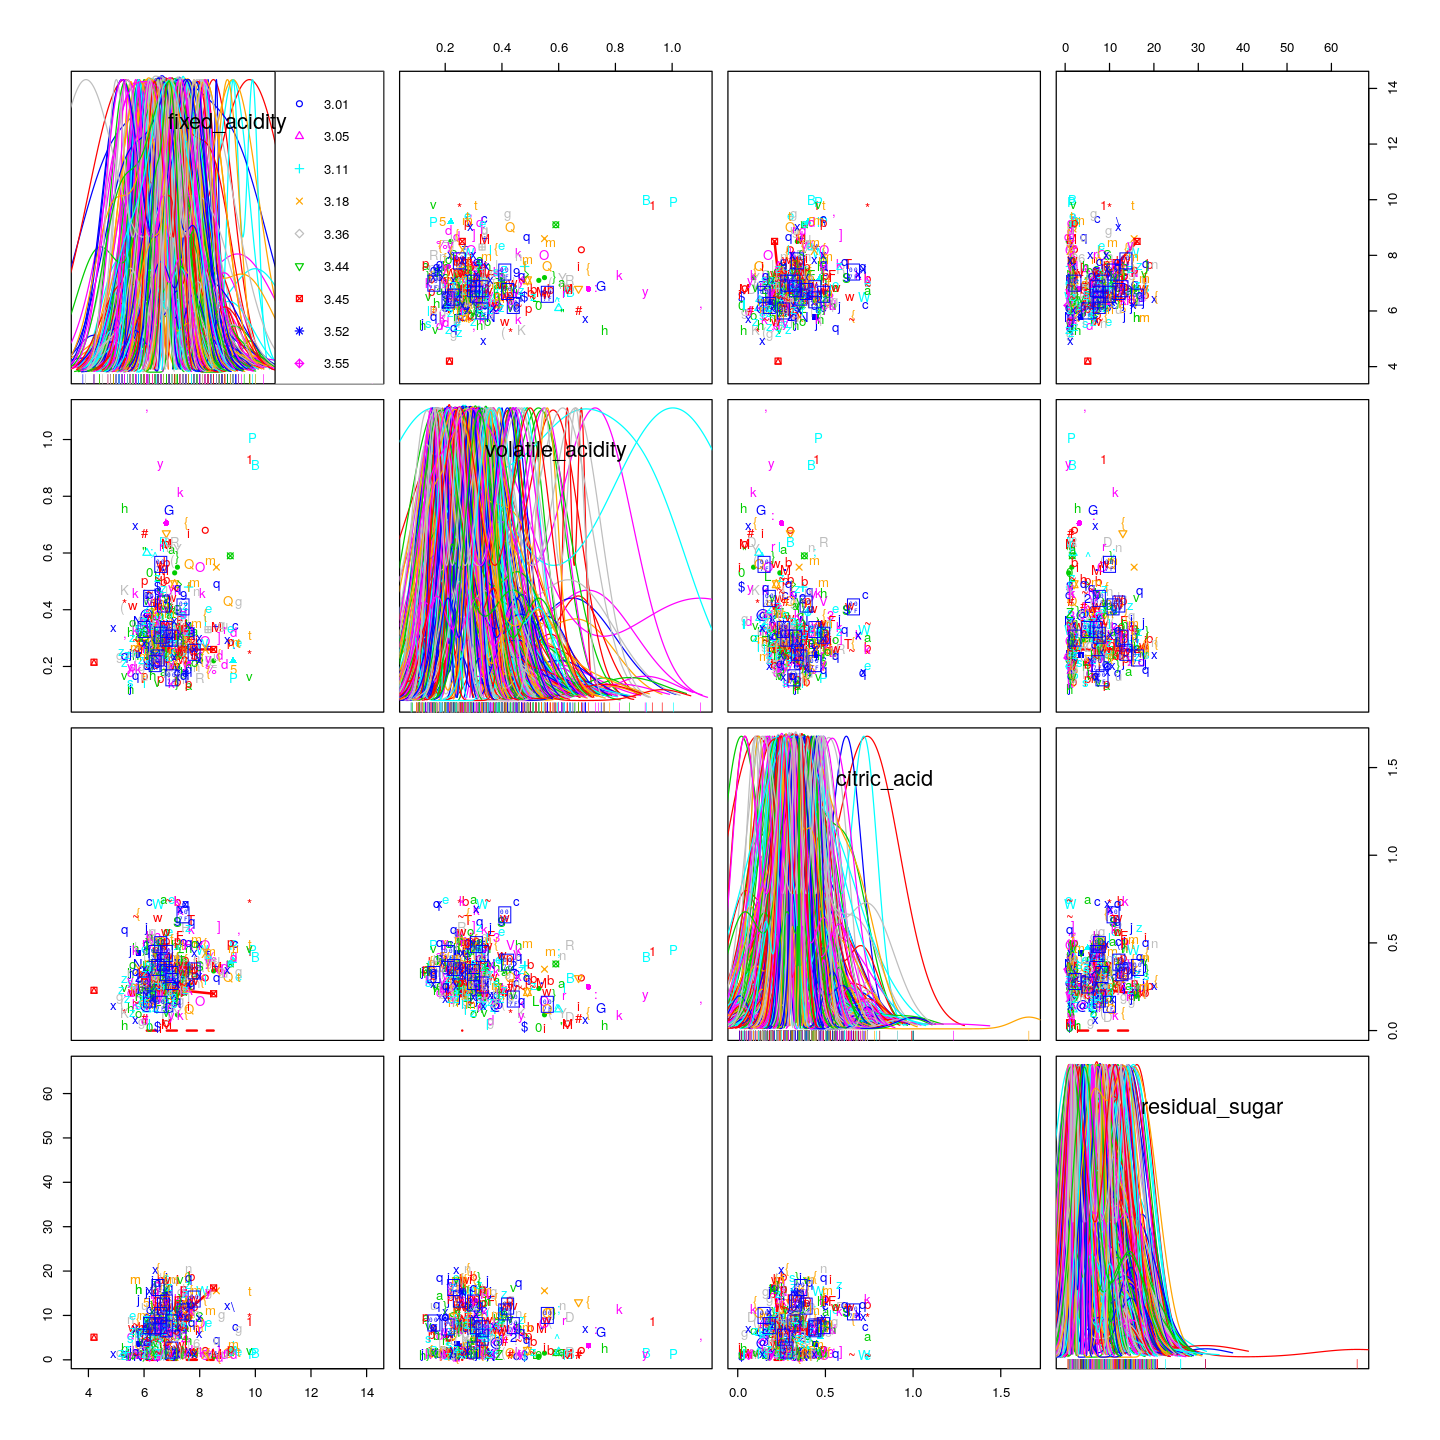

In [15]:
options(repr.plot.width = 12, repr.plot.height=12)

# Esta funcion puede tardar unos minutos. Se recomienda variar la
# cantidad de columnas con las que se va realizar el analisis
scatterplotMatrix(~fixed_acidity+volatile_acidity+citric_acid+residual_sugar|score, data = wine_df)
#scatterplotMatrix(~fixed_acidity+volatile_acidity+citric_acid+residual_sugar
#      +chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH
#      +sulphates+alcohol|score, data = wine_df)

Esta funcion nos permite realizar varios analisis al tiempo:
- **Mapas de dispersion de cada pareja de variables:** Que variables se encuentran correlacionadas entre si? Positivamente o Negativamente?
- **En la columna o fila de graficas de *score*** (nuestra variable objetivo para prediccion) nota alguna variable predictiva altamente correlacionada que nos aporte alto valor predictivo?
- **La diagonal nos muestra la dispersion de cada variable:** Nota algo raro sobre la dispersion de alguna variable en particular?
- **Los colores en la graficas muestran la variable *score*** (nuestra variable objetivo para clasificacion), nota alguna variable predictiva altamente correlacionada que nos aporte alto valor predictivo?

Ademas de verlo graficamente, existe un indicador llamado **indice de correlacion** que permte calcular numericamente que tan relacionadas estan las variables. Este indicador varia de -1 (Correlacion *altamente negativa*) a 1 (Correlacion *altamente positiva*)

In [16]:
cov(wine_df)

fixed_acidity volatile_acidity citric_acid residual_sugar
fixed_acidity         0.6485460443 -2.576547e-03    NA           0.402174944  
volatile_acidity     -0.0025765473  1.020564e-02    NA           0.039351409  
citric_acid                     NA            NA    NA                    NA  
residual_sugar        0.4021749436  3.935141e-02    NA          24.824778581  
chlorides             0.0005894916  1.094397e-04    NA           0.008670909  
free_sulfur_dioxide  -0.3391490288 -1.775856e-01    NA          25.644853085  
total_sulfur_dioxide  4.5929727343  3.533491e-01    NA          81.835390486  
density               0.0006893369  1.076596e-05    NA           0.012292234  
pH                   -0.0410136203 -9.656773e-04    NA          -0.120306269  
sulphates             0.0004888461 -5.970226e-04    NA          -0.019754251  
alcohol              -0.1292022641  6.790689e-03    NA          -2.648449337  
score                -0.0617989159 -1.704490e-02    NA          -0.495326030  
citric.acid           0.0274396463 -1.955056e-03    NA           0.044314527  
                     chlorides     free_sulfur_dioxide total_sulfur_dioxide
fixed_acidity         5.894916e-04  -0.33914903           4.59297273       
volatile_acidity      1.094397e-04  -0.17758557           0.35334913       
citric_acid                     NA           NA                   NA       
residual_sugar        8.670909e-03  25.64485309          81.83539049       
chlorides             4.275495e-04   0.03399807           0.16579901       
free_sulfur_dioxide   3.399807e-02 290.23369753         445.53363178       
total_sulfur_dioxide  1.657990e-01 445.53363178        1789.63456491       
density               1.571851e-05   0.01476947           0.06497411       
pH                   -2.550425e-04  -0.07069612          -0.23377802       
sulphates             4.791584e-06   0.11522429           0.57404261       
alcohol              -9.156456e-03  -5.22639876         -23.08951110       
score                -4.062830e-03  -0.01111606          -7.16585077       
citric.acid           2.218974e-04   0.16397006           0.57476136       
                     density       pH            sulphates     alcohol      
fixed_acidity         6.893369e-04 -4.101362e-02  4.888461e-04  -0.129202264
volatile_acidity      1.076596e-05 -9.656773e-04 -5.970226e-04   0.006790689
citric_acid                     NA            NA            NA            NA
residual_sugar        1.229223e-02 -1.203063e-01 -1.975425e-02  -2.648449337
chlorides             1.571851e-05 -2.550425e-04  4.791584e-06  -0.009156456
free_sulfur_dioxide   1.476947e-02 -7.069612e-02  1.152243e-01  -5.226398758
total_sulfur_dioxide  6.497411e-02 -2.337780e-01  5.740426e-01 -23.089511103
density               8.750647e-06 -3.179236e-05  2.234893e-05  -0.002798219
pH                   -3.179236e-05  1.810821e-02  2.143569e-03   0.018022011
sulphates             2.234893e-05  2.143569e-03  1.289350e-02  -0.001749954
alcohol              -2.798219e-03  1.802201e-02 -1.749954e-03   1.497682362
score                -8.504984e-04  1.322053e-02  6.438043e-03   0.503581907
citric.acid           4.325995e-05 -2.319826e-03  7.485368e-04  -0.006163764
                     score         citric.acid  
fixed_acidity        -0.0617989159  2.743965e-02
volatile_acidity     -0.0170448987 -1.955056e-03
citric_acid                     NA            NA
residual_sugar       -0.4953260299  4.431453e-02
chlorides            -0.0040628303  2.218974e-04
free_sulfur_dioxide  -0.0111160612  1.639701e-01
total_sulfur_dioxide -7.1658507679  5.747614e-01
density              -0.0008504984  4.325995e-05
pH                    0.0132205323 -2.319826e-03
sulphates             0.0064380435  7.485368e-04
alcohol               0.5035819070 -6.163764e-03
score                 0.8679887518  2.650257e-03
citric.acid           0.0026502565  1.383931e-02

Es mas preciso que revisar las graficas una a una, pero ahora son muchos numeros y decimales lo que hace dificil lectura o la toma de alguna decision...
Que pasa si vemos estos valores como un mapa de calor?

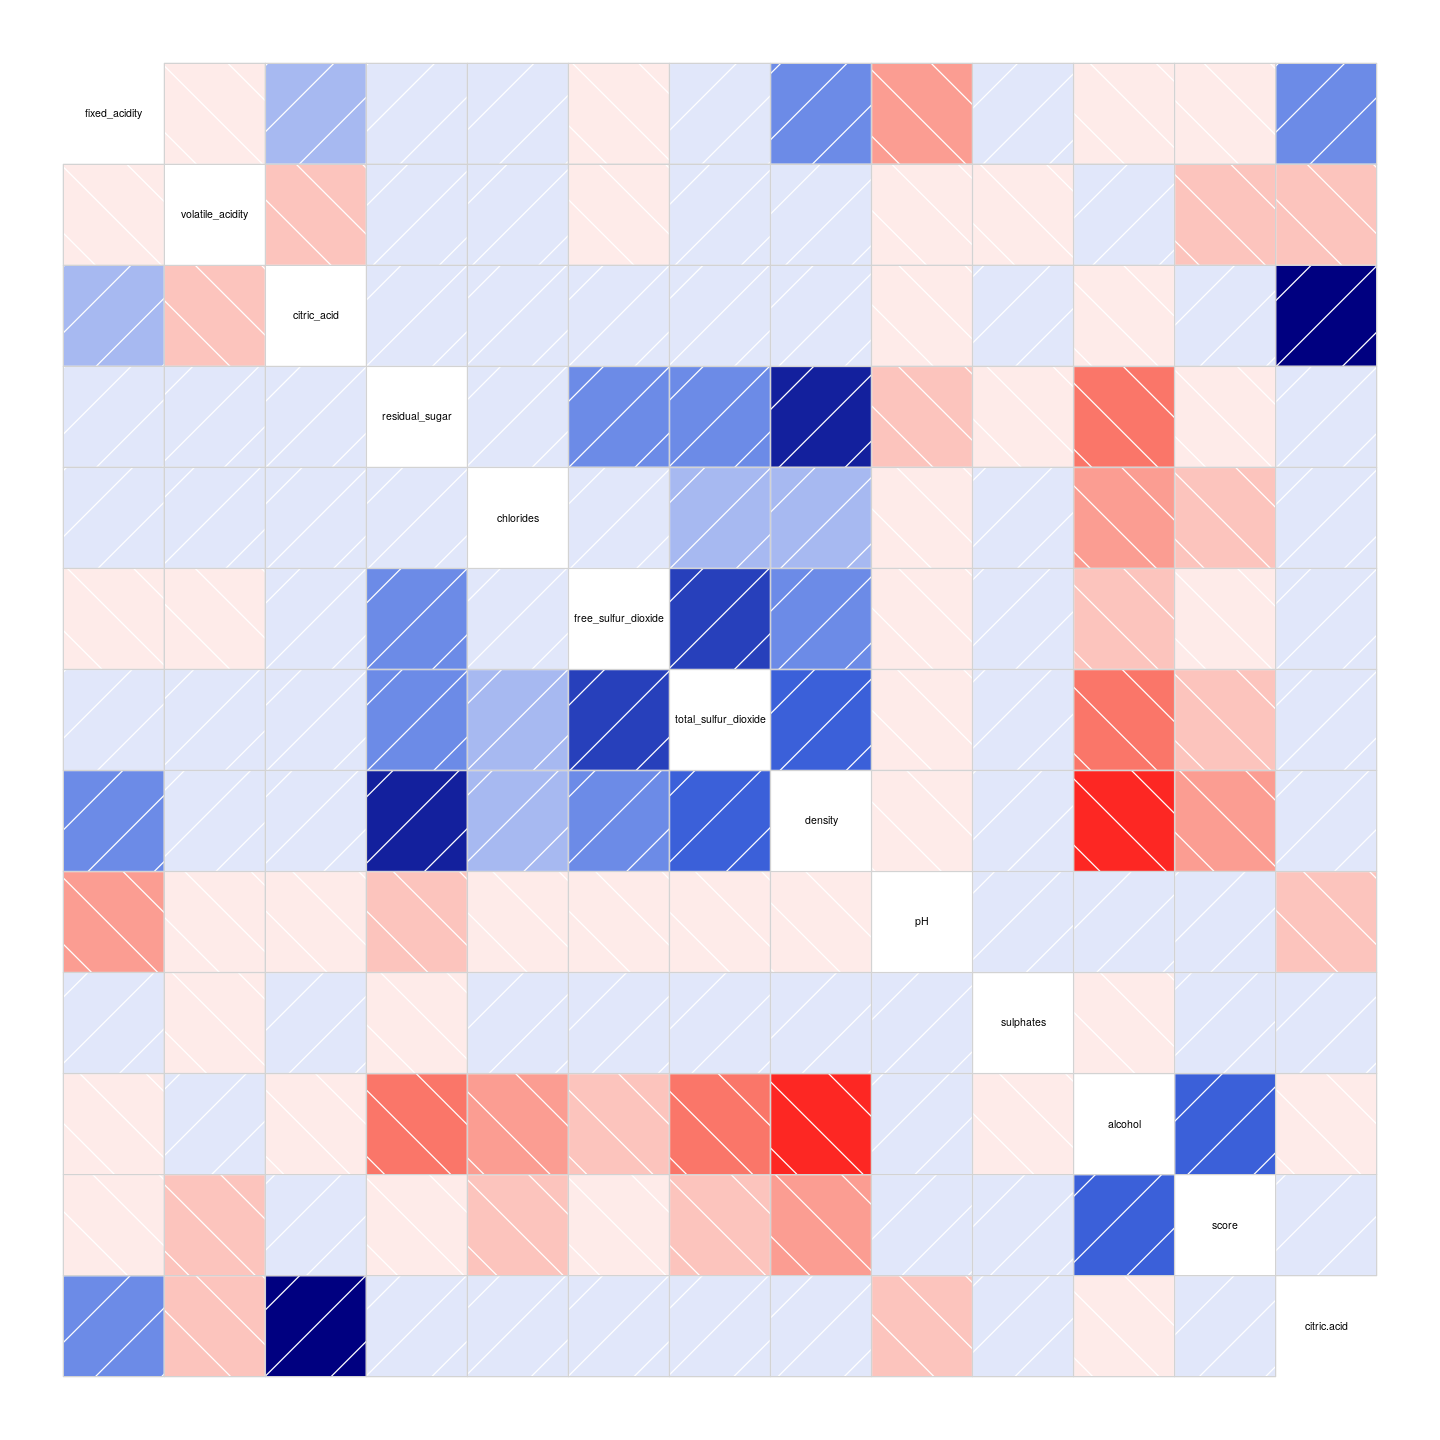

In [17]:
# Esta primera funcion es solo para asignar colores
col.corrgram <- function(ncol){   
  colorRampPalette(c("darkgoldenrod4", "burlywood1",
                     "darkkhaki", "darkgreen"))(ncol)}

corrgram(wine_df, order=NULL, lower.panel=panel.shade,
         upper.panel=panel.shade, text.panel=panel.txt,
         diag.panel=NULL)

Mucho mejor!  Que podemos observar ahora de los atributos?  
Hay unos mas correlacionados que otros? Eso es bueno? o malo?  
*Recuerde que la columna **score** sera nuestra variable objetivo, alta correlacion positiva o negativa con ellas es algo **bueno**.*  

Tenga en cuenta sus descubrimientos para los proximos laboratorios.  
Por ahora, vamos a guardar el set de datos con las transformaciones y limpieza que hemos realizado para usarlo en las siguientes clases.

In [18]:
write.csv(wine_df, 'data/winequality-whiteR_clean.csv', row.names=T)

**Taller**

- Repita el ejercicio para el archivo *winequality-red.csv* en la misma ruta para corregir la calidad de datos y validar su correlacion.  (En ese caso, el archivo no tiene el campo *score* sino *high_quality* que en ese caso sera nuestra variable objetivo pues es el archivo que usaremos para los laboratorios de **Clasificacion**)
- Que otros descubrimientos encuentra en los datos? Intente trabajar con estadarizacion de datos...